In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

 96% 211M/219M [00:01<00:00, 154MB/s]
100% 219M/219M [00:01<00:00, 140MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
# import cv2
import itertools

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential
# from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix,classification_report
import imageio
import matplotlib.image as img
import numpy as np
import os
import pathlib

import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications import imagenet_utils

In [ ]:
data_path = pathlib.Path('rice-image-dataset/Rice_Image_Dataset')


In [ ]:
data_path = pathlib.Path('/kaggle/input/rice-image-dataset/Rice_Image_Dataset')


In [ ]:
!unzip /content/rice-image-dataset.zip

In [ ]:
!rm Rice_Image_Dataset/Rice_Citation_Request.txt

In [ ]:
from pathlib import Path

In [ ]:
folder_path='/content/Rice_Image_Dataset'

In [ ]:
arborio = list(Path(folder_path + 'Arborio').glob('*'))
basmati = list(Path(folder_path + 'Basmati').glob('*'))
ipsala = list(Path(folder_path + 'Ipsala').glob('*'))
jasmine = list(Path(folder_path + 'Jasmine').glob('*'))
karacadag = list(Path(folder_path + 'Karacadag').glob('*'))

In [ ]:
arborio='/content/Rice_Image_Dataset/Arborio'

In [ ]:
from pathlib import Path

# Define the path to the folder
folder_path = '/content/Rice_Image_Dataset'

# Create lists of file paths
arborio = list(Path(folder_path + 'Arborio').glob('*.*'))
basmati = list(Path(folder_path + 'Basmati').glob('*.*'))
ipsala = list(Path(folder_path + 'Ipsala').glob('*.*'))
jasmine = list(Path(folder_path + 'Jasmine').glob('*.*'))
karacadag = list(Path(folder_path + 'Karacadag').glob('*.*'))

In [ ]:
from pathlib import Path

# Define the path to the folder
folder_path = '/content/Rice_Image_Dataset/'

# Create lists of image files for each class
arborio_images = list(Path(folder_path + 'Arborio').glob('*.jpg'))
basmati_images = list(Path(folder_path + 'Basmati').glob('*.jpg'))
ipsala_images = list(Path(folder_path + 'Ipsala').glob('*.jpg'))
jasmine_images = list(Path(folder_path + 'Jasmine').glob('*.jpg'))
karacadag_images = list(Path(folder_path + 'Karacadag').glob('*.jpg'))


In [ ]:
arborio_images

In [ ]:
data = {
    'Arborio' : arborio_images,
    'Basmati' : basmati_images,
    'Ipsala' : ipsala_images,
    'Jasmine' : jasmine_images,
    'Karacadag' : karacadag_images
}
rice_labels= {
    0: "Arborio",
    1: "Basmati",
    2: "Ipsala",
    3:"Jasmine",
    4:"Karacadag"}

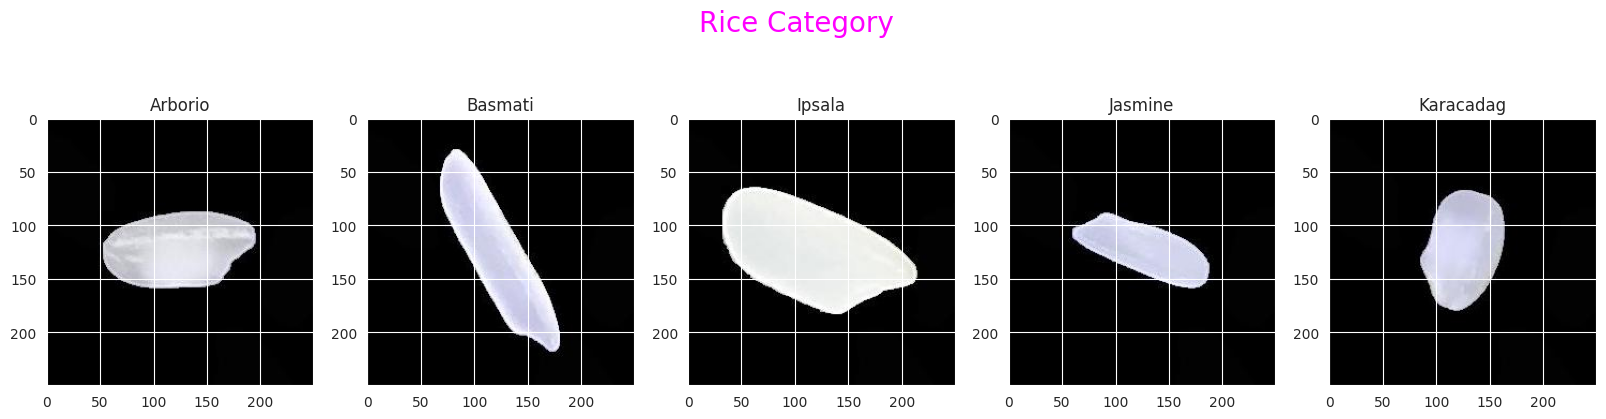

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category',color='magenta',fontsize=20)
arborio_img = img.imread(arborio_images[0])
basmati_img = img.imread(basmati_images[0])
ipsala_img = img.imread(ipsala_images[0])
jasmine_img = img.imread(jasmine_images[0])
karacadag_img = img.imread(karacadag_images[0])

for index,name in enumerate(list(data.keys())):
    ax[index].set_title(name)
    ax[0].imshow(arborio_img)
    ax[1].imshow(basmati_img)
    ax[2].imshow(ipsala_img)
    ax[3].imshow(jasmine_img)
    ax[4].imshow(karacadag_img)

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_gen.flow_from_directory("/content/Rice_Image_Dataset",
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=True,
                                            subset='training')

test_data = train_gen.flow_from_directory("/content/Rice_Image_Dataset",
                                           target_size=(224, 224),
                                           batch_size=1,
                                           shuffle=False,
                                           subset='validation')


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [ ]:
cnn=keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=32,kernel_size=3,
                            padding='valid',activation='relu',input_shape=(224,224,3)))
cnn.add(keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(40,activation='relu'))
cnn.add(keras.layers.Dropout(rate= 0.1, seed= 100))
cnn.add(keras.layers.Dense(units=5,activation='sigmoid'))


In [ ]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 40)                15770920  
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 205       
                                                        

In [ ]:
cnn.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')


In [ ]:
cnn.fit(train_data,epochs=2,validation_data=test_data,shuffle=True)


Epoch 1/2
1875/1875 [==============================] - 190s 98ms/step - loss: 0.1469 - accuracy: 0.9517 - val_loss: 0.0393 - val_accuracy: 0.9873
Epoch 2/2
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0670 - accuracy: 0.9782 - val_loss: 0.0289 - val_accuracy: 0.9918


In [ ]:
def plot(c):
    plt.plot(c.history.history['accuracy'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_accuracy'],marker='*',color='green',markersize=10)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(c.history.history['loss'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_loss'],marker='*',color='green',markersize=10)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()

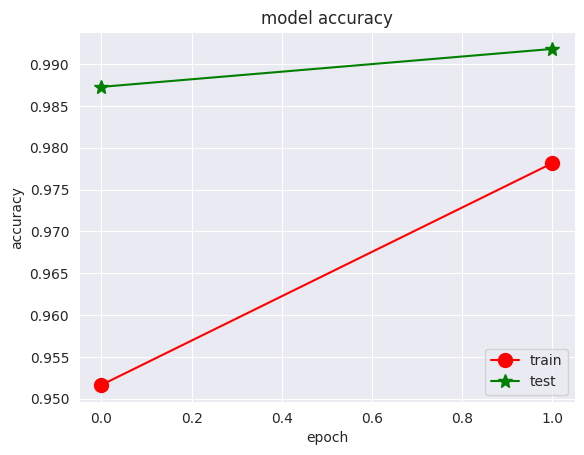

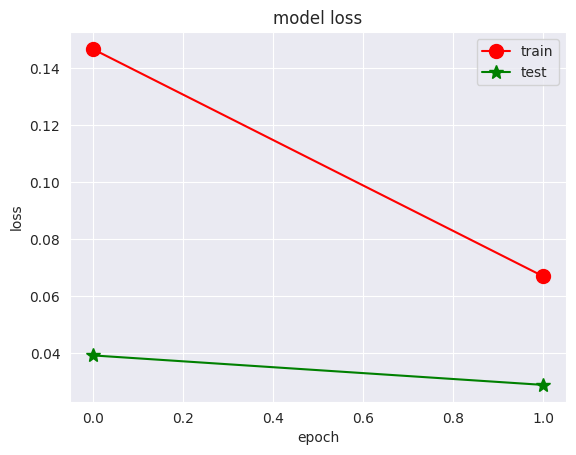

In [ ]:
plot(cnn)

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tqdm import tqdm


input_size = (224, 224, 3)
hidden_size = 8
num_classes = 5

model = Sequential([
    Flatten(),
    Dense(hidden_size, activation='relu'),
    Dense(num_classes)
])

model.compile(optimizer=SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 2
for epoch in range(epochs):
    epoch_loss = 0.0
    epoch_accuracy = 0.0
    for images, labels in tqdm(train_data, desc=f"Epoch {epoch+1}/{epochs}", unit='batch', colour='cyan'):
        flattened_images = images.reshape(images.shape[0], -1)

        loss, accuracy = model.train_on_batch(flattened_images, labels)
        epoch_loss += loss
        epoch_accuracy += accuracy

    epoch_loss /= len(train_data)
    epoch_accuracy /= len(train_data)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}")


test_loss, test_accuracy = model.evaluate(test_data, verbose=0)
print(f"Test Accuracy: {test_accuracy}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications import InceptionV3

# Load the InceptionV3 model with pre-trained weights
inception = InceptionV3(input_shape=(299, 299, 3),
                        include_top=True,
                        weights='imagenet')

# Define a Sequential model
model = Sequential()

# Add an input layer with the specified input shape
model.add(Input(shape=(299,299,3)))

# Add the pre-trained InceptionV3 model as a layer in the Sequential model
model.add(inception)

# Flatten the output of the InceptionV3 model
model.add(Flatten())

# Add a dense layer with 1024 units and ReLU activation
model.add(Dense(1024, activation="relu"))

# Add another dense layer with 512 units and ReLU activation
model.add(Dense(512, activation="relu"))

# Add the output layer with 5 units (assuming 5 classes) and softmax activation
model.add(Dense(5, activation="softmax", name="classification"))

# Print the summary of the model
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1000)              23851784  
                                                                 
 flatten_4 (Flatten)         (None, 1000)              0         
                                                                 
 dense_10 (Dense)            (None, 1024)              1025024   
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 5)                 2565      
                                                                 
Total params: 25404173 (96.91 MB)
Trainable params: 25369741 (96.78 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='SGD',
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data , validation_data = test_data , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 673s 349ms/step - loss: 0.9073 - accuracy: 0.7061 - val_loss: 0.2604 - val_accuracy: 0.9913
Epoch 2/5
1875/1875 [==============================] - 655s 349ms/step - loss: 0.1190 - accuracy: 0.9847 - val_loss: 1.1467 - val_accuracy: 0.7500
Epoch 3/5
1875/1875 [==============================] - 655s 349ms/step - loss: 0.0308 - accuracy: 0.9948 - val_loss: 0.0259 - val_accuracy: 0.9947
Epoch 4/5
1875/1875 [==============================] - 654s 349ms/step - loss: 0.0184 - accuracy: 0.9970 - val_loss: 0.0248 - val_accuracy: 0.9945
Epoch 5/5
1875/1875 [==============================] - 655s 349ms/step - loss: 0.0130 - accuracy: 0.9977 - val_loss: 0.0068 - val_accuracy: 0.9988


In [ ]:
model.evaluate(test_data)

15000/15000 [==============================] - 257s 17ms/step - loss: 0.0068 - accuracy: 0.9988


[0.006796840578317642, 0.9987999796867371]

In [ ]:
from tensorflow.keras.applications import ResNet50
import keras


In [ ]:
base_model = ResNet50(
    weights="imagenet",
    input_shape=(224, 224, 3),
    include_top=False,
)

# Freeze the base_model
base_model.trainable = False


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(32, activation='relu')(x)
outputs = keras.layers.Dense(5, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_12 (Dense)            (None, 32)                3211296   
                                                                 
 dense_13 (Dense)            (None, 5)                 165       
                                                                 
Total params: 26799173 (102.23 MB)
Trainable params: 3211461 (12.25 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
result = model.fit(train_data, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 217s 112ms/step - loss: 1.0646 - accuracy: 0.4728
Epoch 2/10
1875/1875 [==============================] - 209s 111ms/step - loss: 0.8564 - accuracy: 0.5733
Epoch 3/10
1875/1875 [==============================] - 208s 111ms/step - loss: 0.7890 - accuracy: 0.5848
Epoch 4/10
1875/1875 [==============================] - 208s 111ms/step - loss: 0.7589 - accuracy: 0.5866
Epoch 5/10
1875/1875 [==============================] - 209s 111ms/step - loss: 0.7413 - accuracy: 0.5866
Epoch 6/10
1875/1875 [==============================] - 209s 112ms/step - loss: 0.7312 - accuracy: 0.5907
Epoch 7/10
1875/1875 [==============================] - 210s 112ms/step - loss: 0.6431 - accuracy: 0.6872
Epoch 8/10
1875/1875 [==============================] - 209s 111ms/step - loss: 0.4949 - accuracy: 0.7850
Epoch 9/10
1875/1875 [==============================] - 209s 111ms/step - loss: 0.4171 - accuracy: 0.8811
Epoch 10/10
1875/1875 [=======================